# Анализ покупок онлайн-покупателей

# Описание
Датасет "online_shoppers_intention" содержит информацию о сеансах посещения электронного магазина различными пользователями. Вот краткое описание переменных:

1. Administrative: количество страниц с административной информацией, просмотренных пользователем.
2. Administrative_Duration: среднее время, проведенное на страницах с административной информацией.
3. Informational: количество страниц с информационным контентом, просмотренных пользователем.
4. Informational_Duration: среднее время, проведенное на страницах с информационным контентом.
5. ProductRelated: количество страниц, связанных с продуктами, просмотренных пользователем.
6. ProductRelated_Duration: среднее время, проведенное на страницах, связанных с продуктами.
7. BounceRates: процент сеансов, когда пользователь покинул сайт сразу после перехода на него.
8. ExitRates: процент сеансов, когда пользователь покинул сайт на данной странице.
9. PageValues: средняя ценность страницы для пользователя.
10. SpecialDay: насколько дата посещения близка к специальному дню.
12. OperatingSystems: операционная система, используемая пользователем.
13. Browser: браузер, используемый пользователем.
14. Region: географический регион пользователя.
15. TrafficType: тип трафика, по которому пользователь попал на сайт.
16. VisitorType: тип посетителя (новый, возвращающийся).
17. Weekend: был ли день посещения сайта выходным.
18. Revenue: совершила ли пользователь покупку на сайте


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 1. Предобработка данных:
* Загрузите датасет и проверьте наличие пропущенных значений. Обработайте их
* Преобразуйте категориальные переменные, если они есть


In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

print("\nПервые 5 строк:")
print(df.head())

print("\nПропущенные значения:")
print(df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)

le = LabelEncoder()
categorical_cols = ['Month', 'VisitorType', 'Weekend', 'Revenue']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


Первые 5 строк:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0    

## 2. Выбор переменных для кластеризации

In [3]:
features = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
    'Revenue'
]

X = df[features]

## 3. Анализ данных:
* Постройте визуализации (гистограммы, диаграммы рассеяния) для понимания распределения выбранных переменных.
* Рассчитайте основные статистики (средние значения, медианы) для количественных переменных


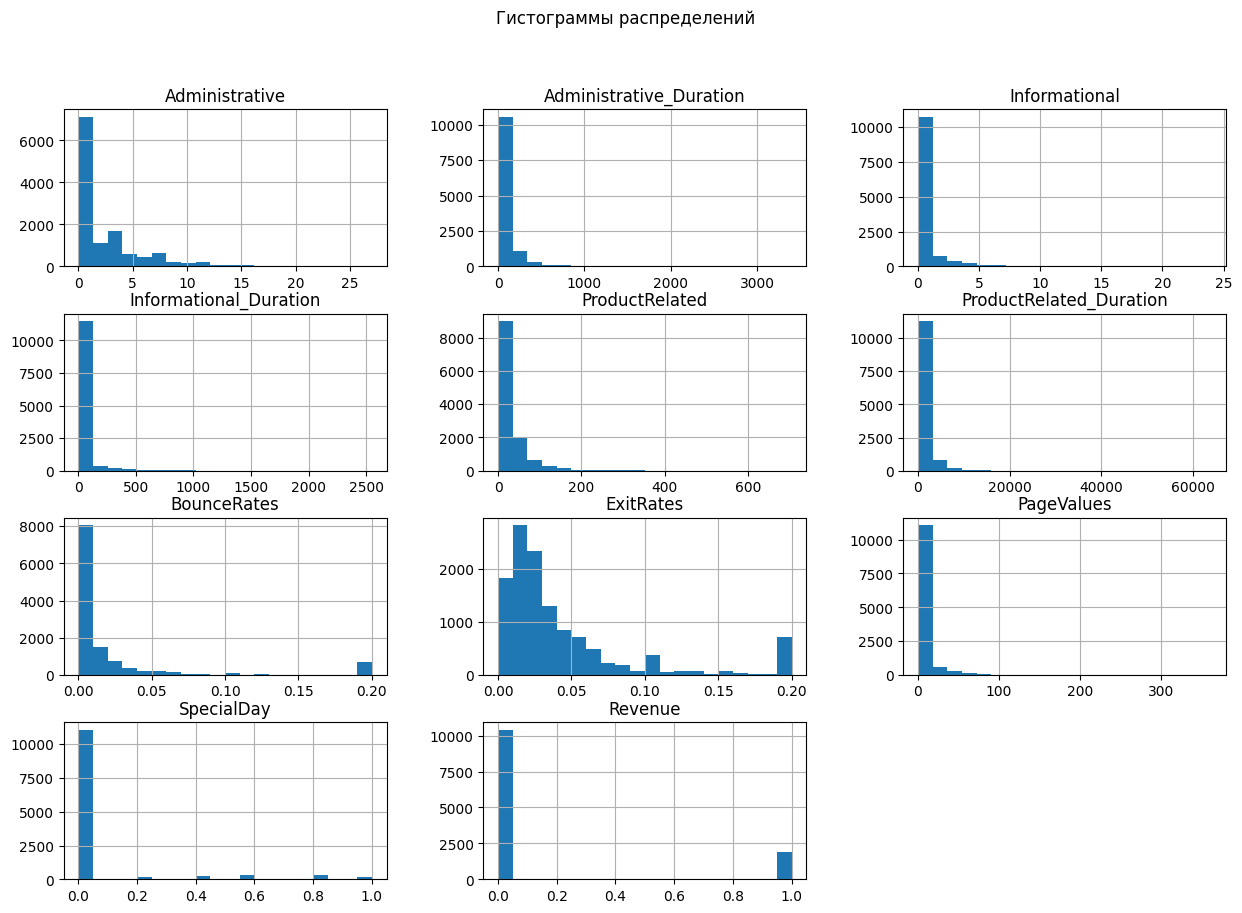

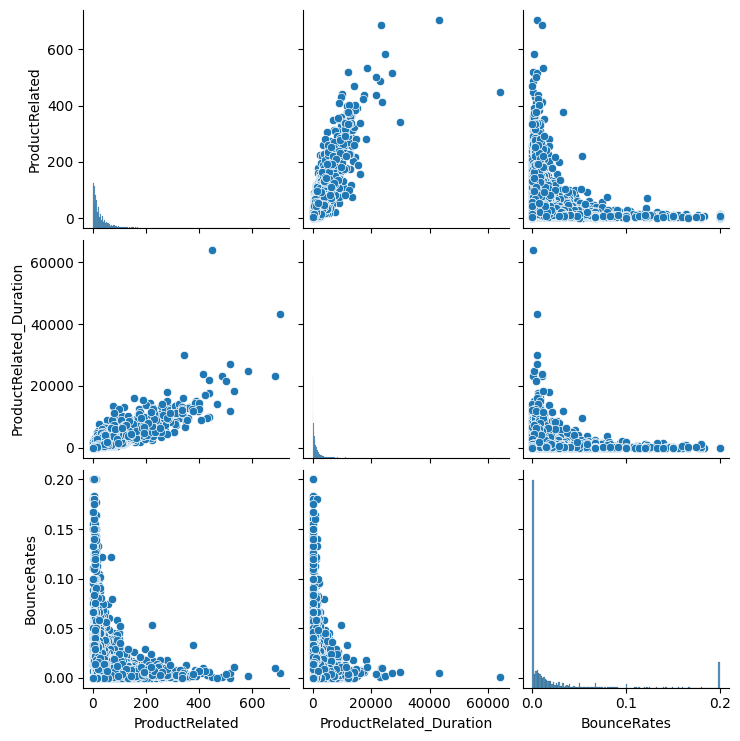


СРЕДНИЕ ЗНАЧЕНИЯ:
Administrative                2.315166
Administrative_Duration      80.818611
Informational                 0.503569
Informational_Duration       34.472398
ProductRelated               31.731468
ProductRelated_Duration    1194.746220
BounceRates                   0.022191
ExitRates                     0.043073
PageValues                    5.889258
SpecialDay                    0.061427
Revenue                       0.154745
dtype: float64

МЕДИАНЫ:
Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
Revenue                      0.000000
dtype: float64

ОПИСАТЕЛЬНАЯ СТАТИСТИКА:
       Administrative  Administrative_Duration  Informational  \
cou

In [4]:
X.hist(bins=20, figsize=(15,10))
plt.suptitle("Гистограммы распределений")
plt.show()

sns.pairplot(X[['ProductRelated', 'ProductRelated_Duration', 'BounceRates']])
plt.show()

print("\nСРЕДНИЕ ЗНАЧЕНИЯ:")
print(X.mean())

print("\nМЕДИАНЫ:")
print(X.median())

print("\nОПИСАТЕЛЬНАЯ СТАТИСТИКА:")
print(X.describe())

## 4. Нормализация данных:
Примените нормализацию или стандартизацию к количественным переменным чтобы избежать влияния масштаба на кластеризацию.


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Определение числа кластеров:
Используйте метод локтя или силуэтный метод для определения оптимального количества кластеров для K-means или другого алгоритма кластеризации.



In [6]:
print("\nСИЛУЭТНЫЕ КОЭФФИЦИЕНТЫ:")

sil_scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score
    print(f'k = {k} | silhouette = {score:.3f}')

best_k = max(sil_scores, key=sil_scores.get)
print(f"\n ОПТИМАЛЬНОЕ ЧИСЛО КЛАСТЕРОВ: k = {best_k}")


СИЛУЭТНЫЕ КОЭФФИЦИЕНТЫ:
k = 2 | silhouette = 0.406
k = 3 | silhouette = 0.331
k = 4 | silhouette = 0.390
k = 5 | silhouette = 0.427
k = 6 | silhouette = 0.410
k = 7 | silhouette = 0.410
k = 8 | silhouette = 0.414
k = 9 | silhouette = 0.414
k = 10 | silhouette = 0.350

 ОПТИМАЛЬНОЕ ЧИСЛО КЛАСТЕРОВ: k = 5


## 6. Кластеризация:
Примените алгоритм K-means или иерархическую кластеризацию к подготовленным данным.


In [7]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Распределение объектов по кластерам:")
print(df['Cluster'].value_counts())

Распределение объектов по кластерам:
Cluster
4    7641
1    1657
2    1169
3     944
0     919
Name: count, dtype: int64


## 7. Визуализация кластеров:
Постройте визуализации для представления результатов кластеризации (например, графики с центрами кластеров и их распределением по различным переменным).



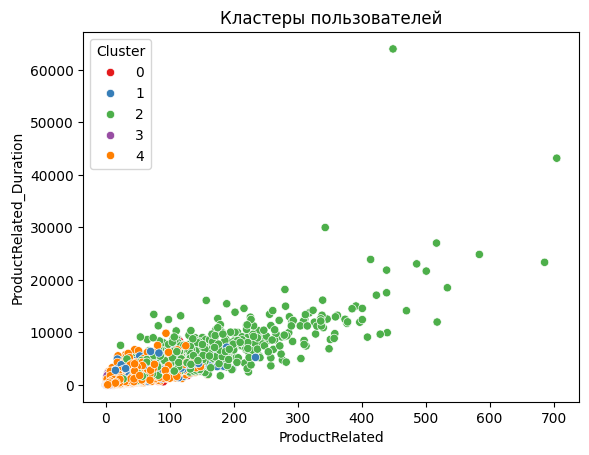


ЦЕНТРЫ КЛАСТЕРОВ:
   Administrative  Administrative_Duration  Informational  \
0        1.071817                30.007882       0.213275   
1        2.652384                87.831082       0.405552   
2        7.664103               336.027925       2.956410   
3        0.033898                 1.110311       0.009534   
4        1.854319                56.175303       0.245157   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0            9.575643e+00       26.850925               906.421806   
1            1.863325e+01       34.471937              1330.018812   
2            2.667357e+02      109.231624              4371.913817   
3            2.984279e-13        2.460805                41.643129   
4            9.592749e+00       23.472382               856.011492   

   BounceRates  ExitRates    PageValues  SpecialDay       Revenue  
0     0.022029   0.050032  1.312553e+00    0.687269  3.373232e-02  
1     0.004647   0.019394  3.195646e+01    0.010501  9.65

In [8]:
sns.scatterplot(
    data=df,
    x='ProductRelated',
    y='ProductRelated_Duration',
    hue='Cluster',
    palette='Set1'
)
plt.title('Кластеры пользователей')
plt.show()

centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=features)

print("\nЦЕНТРЫ КЛАСТЕРОВ:")
print(centers_df)

## 8. Удалить из датасета признак (Revenue) и повторить кластеризацию. Сравнить результаты

k = 2 | silhouette = 0.436
k = 3 | silhouette = 0.452
k = 4 | silhouette = 0.430
k = 5 | silhouette = 0.398
k = 6 | silhouette = 0.408
k = 7 | silhouette = 0.408
k = 8 | silhouette = 0.373
k = 9 | silhouette = 0.355
k = 10 | silhouette = 0.354

 ОПТИМАЛЬНОЕ ЧИСЛО КЛАСТЕРОВ (БЕЗ Revenue): k = 3

Распределение пользователей по кластерам БЕЗ Revenue:
Cluster_no_revenue
0    9652
1    1628
2    1050
Name: count, dtype: int64

СРАВНЕНИЕ КЛАСТЕРОВ ДО И ПОСЛЕ УДАЛЕНИЯ Revenue:
Cluster_no_revenue     0     1    2
Cluster                            
0                    809    35   75
1                   1463   192    2
2                      0  1169    0
3                      0     0  944
4                   7380   232   29


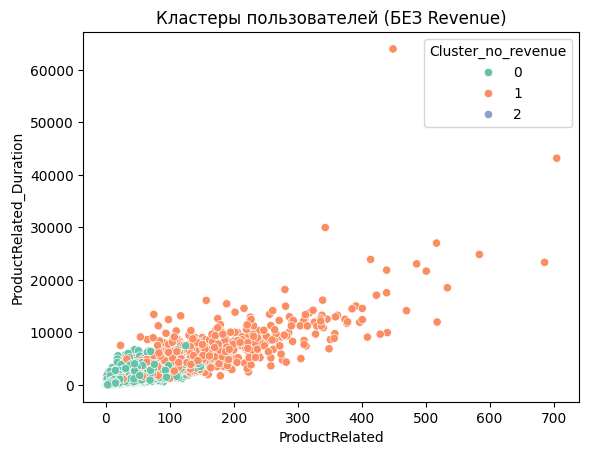


 ПРОЦЕНТНОЕ ПЕРЕРАСПРЕДЕЛЕНИЕ КЛАСТЕРОВ 
Cluster_no_revenue      0       1       2
Cluster                                  
0                   88.03    3.81    8.16
1                   88.29   11.59    0.12
2                    0.00  100.00    0.00
3                    0.00    0.00  100.00
4                   96.58    3.04    0.38

 Остались в том же кластере: 8.12%
Сменили кластер после удаления Revenue: 91.88%


In [9]:
features_no_revenue = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

X_no_revenue = df[features_no_revenue]

scaler2 = StandardScaler()
X_no_revenue_scaled = scaler2.fit_transform(X_no_revenue)

sil_scores_no_rev = {}

for k in range(2, 11):
    kmeans_no_rev = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_no_rev = kmeans_no_rev.fit_predict(X_no_revenue_scaled)
    score_no_rev = silhouette_score(X_no_revenue_scaled, labels_no_rev)
    sil_scores_no_rev[k] = score_no_rev
    print(f'k = {k} | silhouette = {score_no_rev:.3f}')

best_k_no_rev = max(sil_scores_no_rev, key=sil_scores_no_rev.get)
print(f"\n ОПТИМАЛЬНОЕ ЧИСЛО КЛАСТЕРОВ (БЕЗ Revenue): k = {best_k_no_rev}")

kmeans_no_revenue = KMeans(n_clusters=best_k_no_rev, random_state=42, n_init=10)
df['Cluster_no_revenue'] = kmeans_no_revenue.fit_predict(X_no_revenue_scaled)

print("\nРаспределение пользователей по кластерам БЕЗ Revenue:")
print(df['Cluster_no_revenue'].value_counts())

print("\nСРАВНЕНИЕ КЛАСТЕРОВ ДО И ПОСЛЕ УДАЛЕНИЯ Revenue:")
comparison = pd.crosstab(df['Cluster'], df['Cluster_no_revenue'])
print(comparison)

sns.scatterplot(
    data=df,
    x='ProductRelated',
    y='ProductRelated_Duration',
    hue='Cluster_no_revenue',
    palette='Set2'
)
plt.title('Кластеры пользователей (БЕЗ Revenue)')
plt.show()

comparison_percent = comparison.div(comparison.sum(axis=1), axis=0) * 100

print("\n ПРОЦЕНТНОЕ ПЕРЕРАСПРЕДЕЛЕНИЕ КЛАСТЕРОВ ")
print(comparison_percent.round(2))

same_cluster_percent = (df['Cluster'] == df['Cluster_no_revenue']).mean() * 100
changed_cluster_percent = 100 - same_cluster_percent

print(f"\n Остались в том же кластере: {same_cluster_percent:.2f}%")
print(f"Сменили кластер после удаления Revenue: {changed_cluster_percent:.2f}%")